In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('/Users/yoo/Google Drive/내 드라이브/ML_Algorithm/datasets/BigBasket Products.csv')
print(df.shape)

df.head(10)

(27555, 10)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [12]:
from pandas_profiling import profile_report

df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64


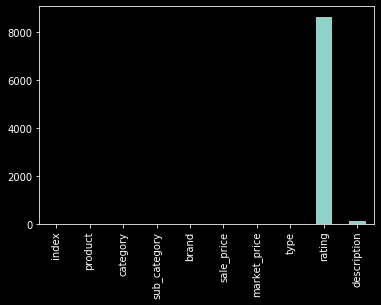

In [8]:
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

In [17]:
df = df.iloc[:, :-2]
df.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets"
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove"


index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
dtype: int64


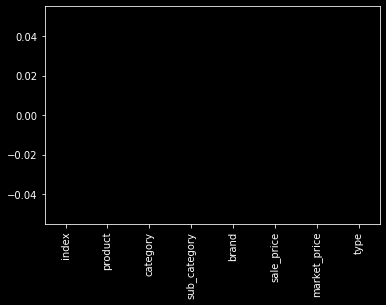

In [20]:
df = df.dropna(axis=0)

print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

In [35]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# declare
encoder = OrdinalEncoder()
scaler = StandardScaler()

# partition by encoding columns, original use columns
df_partition_1 = df[['product', 'category', 'sub_category', 'brand', 'type']]
df_partition_2 = df[['market_price', 'sale_price']]

# encoding dimension table
df_dim_encode = pd.concat([df_partition_1, pd.DataFrame(encoder.fit_transform(df_partition_1))],axis=1)
print(df_dim_encode.shape)
print(df_dim_encode.head(10))

df_encode = pd.concat([pd.DataFrame(encoder.fit_transform(df_partition_1), columns=df_partition_1.columns), df_partition_2], axis=1)
df_encode.head(10)

(27555, 10)
                                             product                category  \
0             Garlic Oil - Vegetarian Capsule 500 mg        Beauty & Hygiene   
1                              Water Bottle - Orange  Kitchen, Garden & Pets   
2                     Brass Angle Deep - Plain, No.2    Cleaning & Household   
3  Cereal Flip Lid Container/Storage Jar - Assort...    Cleaning & Household   
4                 Creme Soft Soap - For Hands & Body        Beauty & Hygiene   
5                  Germ - Removal Multipurpose Wipes    Cleaning & Household   
6                                       Multani Mati        Beauty & Hygiene   
7                  Hand Sanitizer - 70% Alcohol Base        Beauty & Hygiene   
8  Biotin & Collagen Volumizing Hair Shampoo + Bi...        Beauty & Hygiene   
9               Scrub Pad - Anti- Bacterial, Regular    Cleaning & Household   

             sub_category              brand                           type  \
0               Hair Care  S

,product,category,sub_category,brand,type,market_price,sale_price
0,8276.0,2.0,49.0,1959.0,204.0,220.0,220.0
1,22934.0,9.0,86.0,1258.0,420.0,180.0,180.0
2,2957.0,4.0,73.0,2125.0,249.0,250.0,119.0
3,3573.0,4.0,9.0,1386.0,250.0,176.0,149.0
4,5476.0,2.0,8.0,1455.0,39.0,162.0,162.0
5,8404.0,4.0,0.0,1403.0,129.0,199.0,169.0
6,13196.0,2.0,80.0,1834.0,154.0,58.0,58.0
7,9458.0,2.0,8.0,262.0,208.0,250.0,250.0
8,2497.0,2.0,49.0,1967.0,368.0,1098.0,1098.0
9,19082.0,4.0,60.0,1852.0,415.0,20.0,20.0
